In [2]:
!pip install opendatasets
!pip install pandas

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"armutri","key":"129d3395464a8b400d13aaa17f027bd7"}'}

In [5]:
import os
# Move the kaggle.json file to the appropriate directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the kaggle.json file
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [6]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs


Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
 98% 483M/492M [00:03<00:00, 138MB/s]
100% 492M/492M [00:03<00:00, 138MB/s]


In [7]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Stocks/ergf.us.txt  
  inflating: /content/dataset/Stocks/erh.us.txt  
  inflating: /content/dataset/Stocks/eri.us.txt  
  inflating: /content/dataset/Stocks/eric.us.txt  
  inflating: /content/dataset/Stocks/erie.us.txt  
  inflating: /content/dataset/Stocks/erii.us.txt  
  inflating: /content/dataset/Stocks/erj.us.txt  
  inflating: /content/dataset/Stocks/erm.us.txt  
  inflating: /content/dataset/Stocks/ern.us.txt  
  inflating: /content/dataset/Stocks/eros.us.txt  
  inflating: /content/dataset/Stocks/eryp.us.txt  
  inflating: /content/dataset/Stocks/es.us.txt  
  inflating: /content/dataset/Stocks/esba.us.txt  
  inflating: /content/dataset/Stocks/esbk.us.txt  
  inflating: /content/dataset/Stocks/esca.us.txt  
  inflating: /content/dataset/Stocks/esdi.us.txt  
  inflating: /content/dataset/Stocks/esdiw.us.txt  
  inflating: /content/dataset/Stocks/ese.us.txt  
  inflating: /content/dataset/Stocks/e

In [ ]:
import os

# List the files in the extracted directory
os.listdir('/content/dataset/')


['Data', 'Stocks', 'ETFs']

In [ ]:
# Open and read the first few lines of the .txt file to inspect the content
with open('/content/dataset/Stocks/msft.us.txt', 'r') as file:
    lines = file.readlines()

# Display the first few lines
print(lines[:10])  # Adjust the number of lines displayed as needed


['Date,Open,High,Low,Close,Volume,OpenInt\n', '1986-03-13,0.0672,0.07533,0.0672,0.07533,1371330506,0\n', '1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0\n', '1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0\n', '1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0\n', '1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0\n', '1986-03-20,0.07533,0.07533,0.0672,0.07533,77665088,0\n', '1986-03-21,0.07533,0.07533,0.0672,0.0672,79732075,0\n', '1986-03-24,0.0672,0.0672,0.0672,0.0672,86775144,0\n', '1986-03-25,0.0672,0.0672,0.0672,0.0672,42641156,0\n']


In [9]:
import pandas as pd

# Load the comma-separated file
df = pd.read_csv('/content/dataset/Stocks/msft.us.txt', delimiter=',')

# Display the first few rows
df.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [12]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv("/content/dataset/Stocks/msft.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [13]:
print(df.head())
print(df.shape)
print(df.columns)

         Date     Open     High      Low    Close      Volume  OpenInt
0  1986-03-13  0.06720  0.07533  0.06720  0.07533  1371330506        0
1  1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463        0
2  1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245        0
3  1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008        0
4  1986-03-19  0.07533  0.07533  0.07533  0.07533    63655515        0
(7983, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


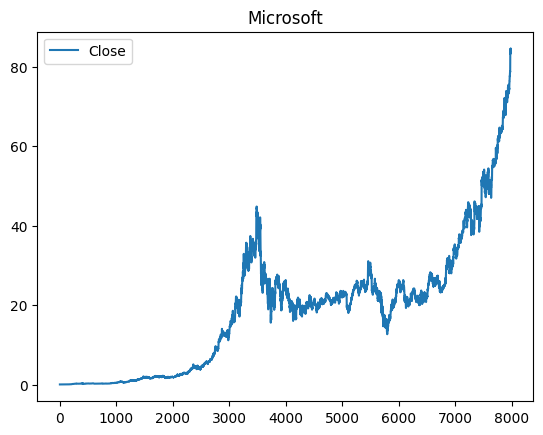

In [14]:
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

Text(0.5, 1.0, 'Microsoft Cumulative Returns')

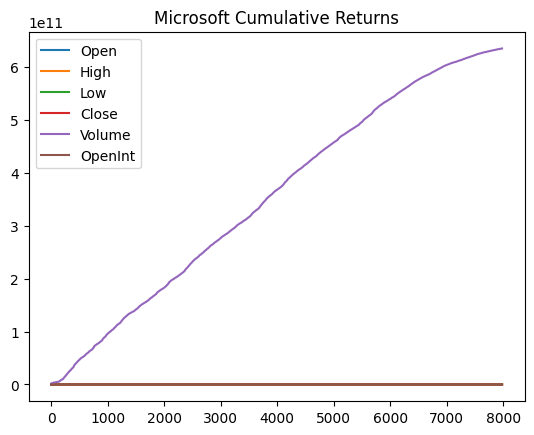

In [16]:
dr = df.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

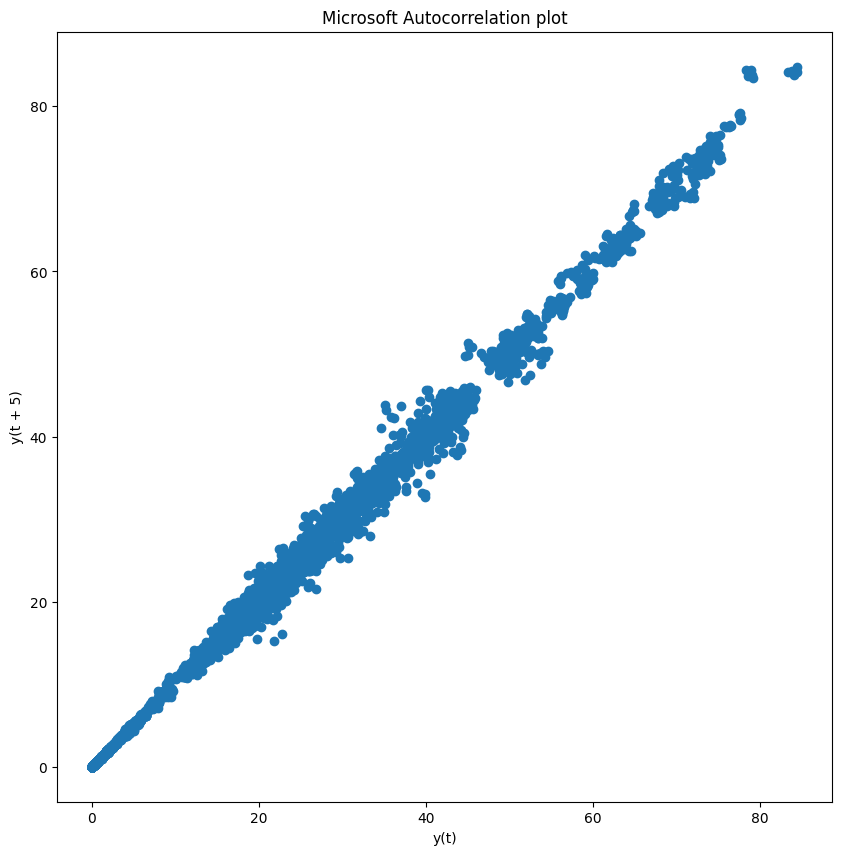

In [18]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')